# Lab | matplotlib-seaborn

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1

#### Data

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots

Also, play around with the linewidth and style. Use the ones you're most happy with.

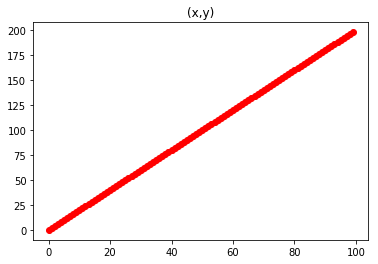

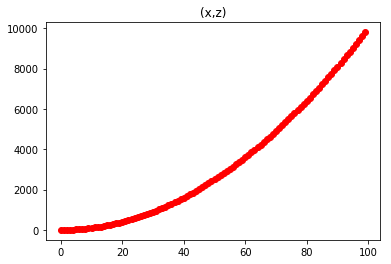

In [21]:
# your code here-1st way
plt.plot(x, y, 'ro')
plt.title('(x,y)')
plt.show()
plt.plot(x, z, 'ro')
plt.title('(x,z)')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

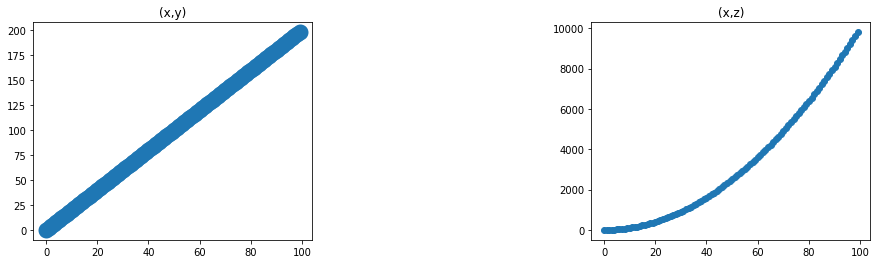

In [19]:
# your code here-2st way
f, ax = plt.subplots(1, 2)
f.set_figwidth(15)
f.subplots_adjust(wspace = 1)
ax[0].set_title("(x,y)")
ax[1].set_title("(x,z)")
ax[0].scatter(x, y, linewidth = 10)
ax[1].scatter(x, z)

#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

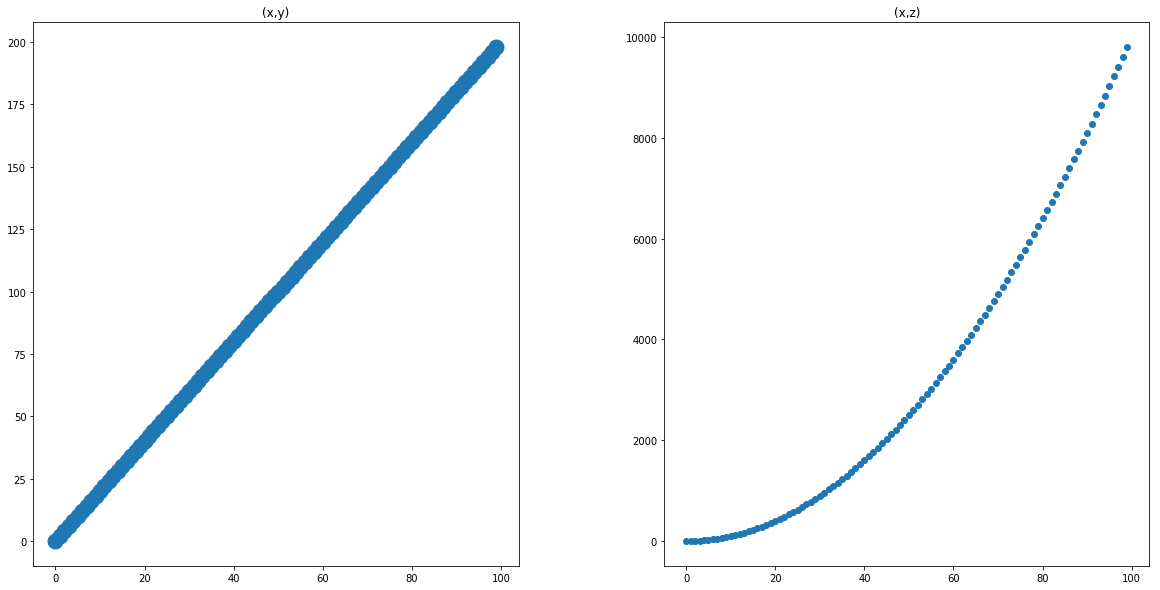

In [36]:
# your code here
f, ax = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(wspace = 0.3)
ax[0].set_title("(x,y)")
ax[1].set_title("(x,z)")
ax[0].scatter(x, y, linewidth = 10)
ax[1].scatter(x, z)

#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

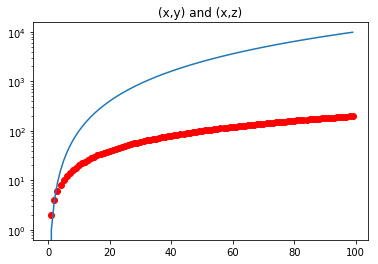

In [42]:
#your code here
plt.plot(x, y, 'ro', z)
plt.xscale('linear')
plt.yscale('log')
plt.title('(x,y) and (x,z)')
plt.show()

# Challenge 2

#### Import the Fitbit2.csv file and name your dataset fitbit. You can also connect to the Ironhack database to retrieve the data (db: fitbit, table: fitbit2).

In [44]:
# your code here
import irondb
df = irondb.sql_get('fitbit','fitbit2')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.
Hints:

Use Months_encoded and Week_or Weekend columns
Use matplolib.pyplot object oriented API
Set your size figure to 12,4
Explore plt.sca
Explore plt.xticks
Save your figures

In [58]:
# Median Steps by Month_encoded
df_month = df.groupby('Months_encoded').median()['Steps']

# Median Steps by Work_or_Weekend
df_day = df.groupby('Work_or_Weekend').median().Steps

In [67]:
df_day

Work_or_Weekend
0     9998.0
1    10445.5
Name: Steps, dtype: float64

<BarContainer object of 2 artists>

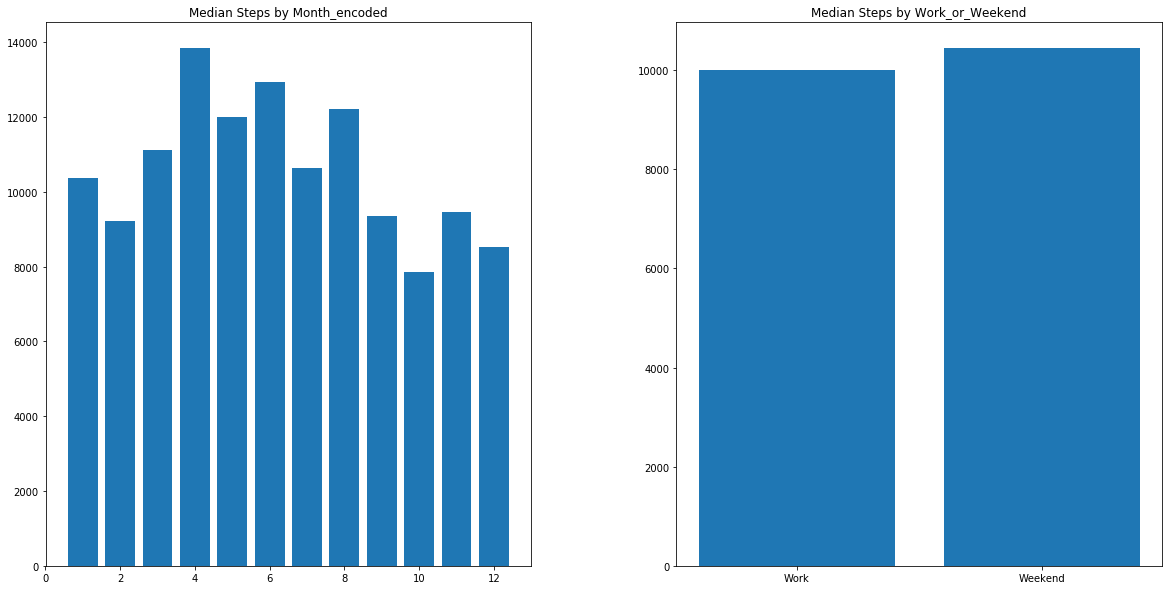

In [68]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(wspace = 0.3)
ax[0].set_title("Median Steps by Month_encoded")
ax[1].set_title("Median Steps by Work_or_Weekend")
ax[0].bar(range(1,13), df_month)
ax[1].bar(['Work','Weekend'], df_day)

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

In [69]:
df.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

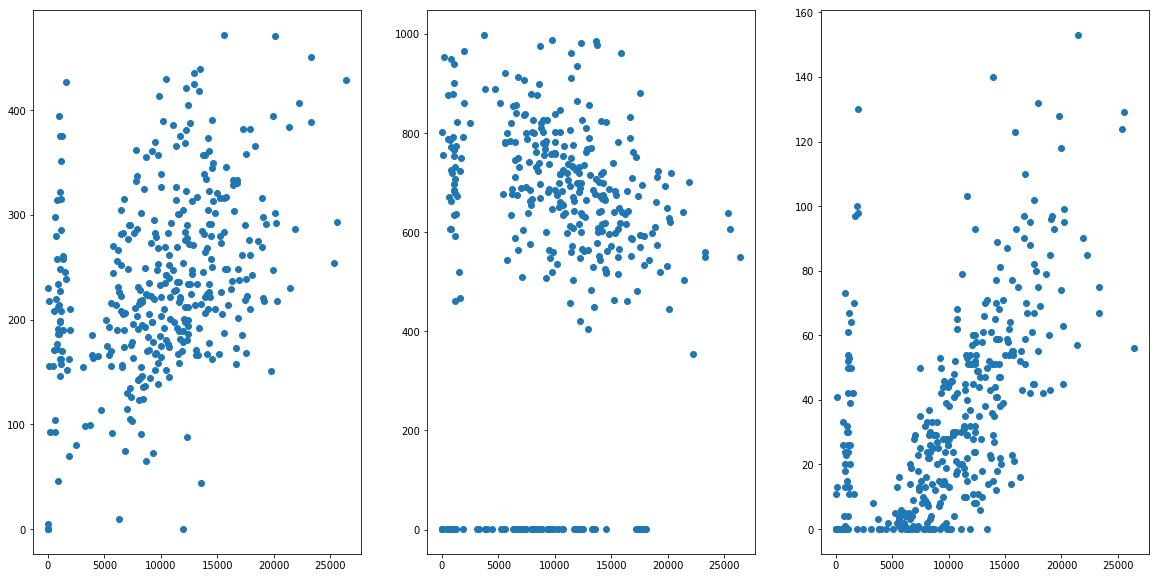

In [71]:
f, ax = plt.subplots(1, 3, figsize=(20,10))
cols = ['Minutes Lightly Active', 'Minutes Sedentary', 'Minutes Very Active']

for i in range(3):
    ax[i].scatter(df['Steps'], df[cols[i]])                                  

# Challenge 3

#### Open the titanic file. Name your dataset titanic. You can also connect to the Ironhack database to retrieve the data (db: titanic, table: titanic).

In [150]:
# your code here
import irondb
titanic = irondb.sql_get('titanic','titanic')

#### Explore the titanic dataset using Pandas dtypes

In [75]:
#your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Gender         1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [80]:
# your code here- numerical variable
titanic.select_dtypes(['int64', 'float64']).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [81]:
#your code here- categorical variable
titanic.select_dtypes(['object']).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6)
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

In [82]:
# your code here
sns.set_style()

#### Use the right visulalization to show the distribution of the column Age

In [85]:
# your code here
titanic['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

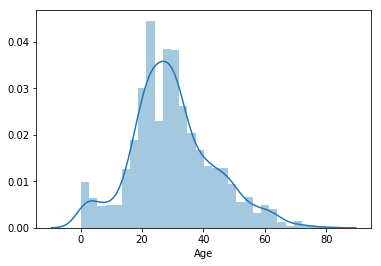

In [87]:
sns.distplot(titanic['Age'])

#### Use subplots and plot the distribution of the Age variable with bins equal to 10,20 and 50.

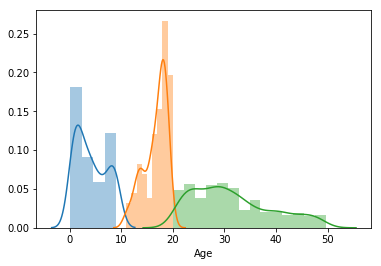

In [130]:
#sns.distplot(titanic['Age'], bins= [0,10,20,50])

titanic['Age_bins'] = pd.cut(titanic['Age'], bins = [0,10,20,50])

#len(titanic['Age_bins'])

bin_1 = titanic[titanic['Age']<10]['Age']
bin_2 = titanic[(titanic['Age'] < 20) & (titanic['Age'] > 10)]['Age']
bin_3 = titanic[(titanic['Age'] < 50) & (titanic['Age'] > 20)]['Age']

sns.distplot(bin_1)
sns.distplot(bin_2)
sns.distplot(bin_3)


#sns.distplot(titanic[titanic['Age_bins'] == '(20.0, 50.0]'])

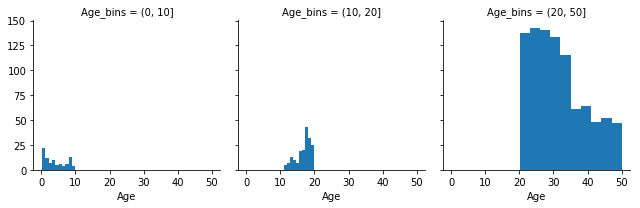

In [137]:
g = sns.FacetGrid(titanic, col='Age_bins')
g.map(plt.hist, 'Age')

#### How does the bin size affect your plot? Comment.

In [ ]:
#your comment here
#It affects my plot as every distribution is independent and the total numbers are not considered.

#### Use seaborn to show the distribution of the column Age

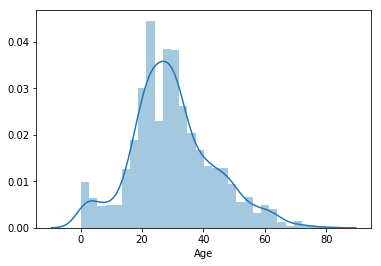

In [131]:
# your code here
sns.distplot(titanic['Age'])

#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

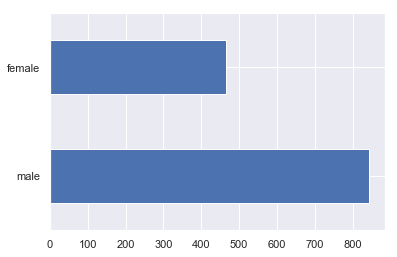

In [152]:
# your code here- 1st way

titanic['Gender'].value_counts().plot(kind='barh')


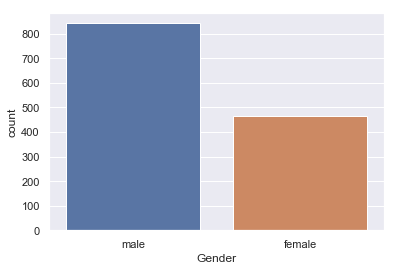

In [151]:
# your code here- 2nd way

sns.set(style="darkgrid")
ax = sns.countplot(x = titanic['Gender'])

In [132]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_bins'],
      dtype='object')

In [136]:
titanic['Gender'].value_counts()

male      843
female    466
Name: Gender, dtype: int64

#### Use the right plot to visualize the column Pclass

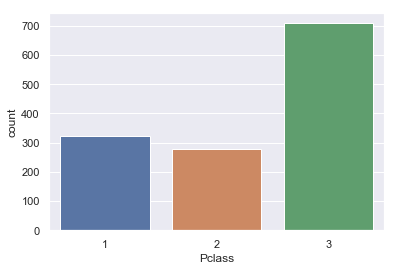

In [154]:
# your code here

sns.set(style="darkgrid")
ax = sns.countplot(x = titanic['Pclass'])

#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

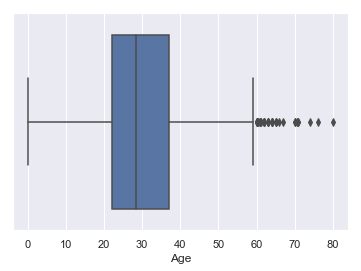

In [155]:
#your comment here
sns.boxplot(titanic['Age'])


#### What does the last plot tells you about the feature Age? Comment.

In [ ]:
# your comment here
#Old people are outliers. Median is arround 29. Min:0, max: 59, 50% people have bt 22 and 38.

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

[Text(0.5, 0, '')]

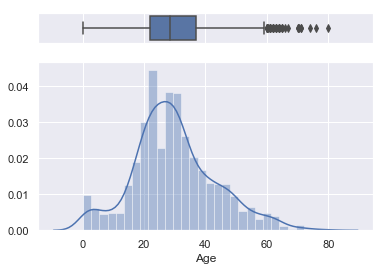

In [158]:
#your code here
#your comment here

 
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(titanic['Age'], ax=ax_box)
sns.distplot(titanic['Age'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


#### What additional information the last plot provides you about the feature Age? Comment.

In [ ]:
#your comment here
#The mode is not near the median

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn

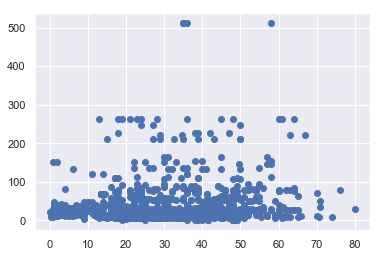

In [167]:
#your code- 1st way

plt.scatter(titanic['Age'], titanic['Fare'])


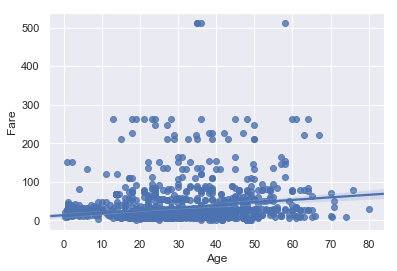

In [169]:
sns.regplot(titanic['Age'], titanic['Fare'])

#### Using Seaborn plot the correlation matrix 

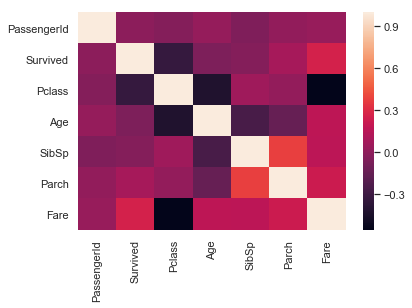

In [173]:
#your code here
sns.heatmap(titanic.corr())

#### What are the most correlated feature? Comment

In [ ]:
#your comment here
#SipSp with Parch

#### Use the right plot to display the summary statistics of the Age in function of the Pclass

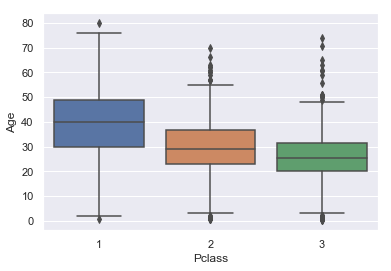

In [177]:
#your code here
 
sns.boxplot(x=titanic["Pclass"], y=titanic["Age"])

#### Use the seaborn to plot the distribution of the Age based on the Gender
Hint: Use Facetgrid

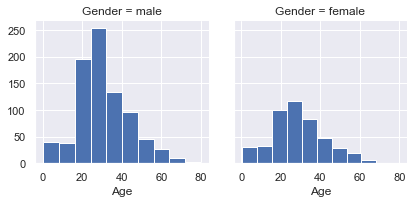

In [178]:
#your code here
g = sns.FacetGrid(titanic, col='Gender')
g.map(plt.hist, 'Age')